<a href="https://colab.research.google.com/github/aoifekeane/EE475-Project/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
import matplotlib.cm as cm
import itertools

- importing dependencies

In [ ]:
keys_to_fill = {
    'Dmajor': ([0.5,1,0.965926,0.866,0.4333,0.482963],[0,0,0.258819,0.5,0.25,0.12941]),
    'Bminor':([0,0.5,0.482963,0.4333,0],[0,0,0.12941,0.25,0]),
    'Gmajor': ([0.4333,0.866,0.707107,0.5,0.25,0.353553],[0.25,0.5,0.707107,0.866,0.433,0.353553]),
    'Eminor':([0,0.4333,0.353553,0.25,0],[0,0.25,0.353553,0.433,0]),
    'Cmajor':([0,0,0.12941,0.25,0.5,0.258819],[1,0.5,0.482963,0.433,0.866,0.965926]),
    'Aminor':([0,0,0.25,0.12941],[0.5,0,0.433,0.482963]),
    'Fmajor':([0,0,-0.12941,-0.25,-0.5,-0.258819],[1,0.5,0.482963,0.433,0.866,0.965926]),
    'Dminor':([0,0,-0.25,-0.12941],[0.5,0,0.433,0.482963]),
    'Gminor':([0,-0.4333,-0.353553,-0.25,0],[0,0.25,0.353553,0.433,0]),
    'Amajor':([0.5,1,0.965926,0.866,0.4333,0.482963],[0,0,-0.258819,-0.5,-0.25,-0.12941]),
    'Emajor':([0.4333,0.866,0.707107,0.5,0.25,0.353553],[-0.25,-0.5,-0.707107,-0.866,-0.433,-0.353553])}

keys_to_no_clusters = {
    'Dmajor': 4,
    'Bminor': 6,
    'Gmajor': 4,
    'Eminor': 5,
    'Cmajor': 4,
    'Aminor': 4,
    'Fmajor': 2,
    'Dminor': 5,
    'Gminor': 3,
    'Amajor': 4,
    'Emajor': 3
    }

- setting the fill locations of each key on the circle of fifths
- setting the number of clusters for each 

In [ ]:
keys_to_co_ords = {
    'Dmajor': (0.965926,0.258819),
    'Bminor':(0.482963,0.12941),
    'Gmajor': (0.707107,0.707107),
    'Eminor':(0.353553,0.353553),
    'Cmajor':(0.258819,0.965926),
    'Aminor':(0.12941,0.482963),
    'Fmajor':(-0.258819,0.965926),
    'Dminor':(-0.12941,0.482963),
    'Bflatmajor':(-0.707107,0.707107),
    'Gminor':(-0.353553,0.353553),
    'Eflatmajor':(-0.707107,0.707107),
    'Cminor':(-0.482963,0.12941),
    'Amajor':(0.965926,-0.258819),
    'Fsharpminor':(0.482963,-0.12941),
    'Emajor':(0.707107,-0.707107),
    'Csharpminor':(0.353553,-0.353553),
    'Bmajor':(0.258819,-0.965926	),
    'Gsharpminor':(0.12941,-0.482963),
    'Gflatmajor':(-0.258819,-0.965926),
    'Eflatminor':(-0.12941,-0.482963),
    'Dflatmajor':(-0.707107,-0.707107),
    'Bflatminor':(-0.353553,-0.353553),
    'Aflatmajor':(-0.965926	,-0.258819),
    'Fminor':(-0.482963,-0.12941)

}
list_of_modes = ['Edorian', 'Dmixolydian', 'Ddorian',
                 'Amixolydian', 'Adorian', 'Gdorian',
                 'Gmixolydian', 'Bdorian', 'Emixolydian', 
                 'Bmixolydian', 'Fdorian', 'Cdorian']

- setting the coordinates to plot each key on the circle of fifths
- recording a list of modes
  - any data that contains a mode will be excluded from clustering

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/project/sets.csv")
set_data = df[['tuneset','settingorder', 'name','type','mode']]
set_data_3 = set_data.groupby('tuneset').filter(lambda x: len(x) == 3)
discrete_tunesets_3 = set_data_3.tuneset.unique()
df_dict_3 = {elem : pd.DataFrame for elem in discrete_tunesets_3}
i = 0
for key in df_dict_3.keys():
  i +=1
  df_dict_3[key] = set_data_3[:][set_data_3.tuneset == key]

- reads in the entire set database
- filters it so that we're only dealing with sets that are three tunes long

In [ ]:
mode_data_3 = np.empty((3616,3,2), dtype=float)
i =0
for key in df_dict_3.keys():
  samp = df_dict_3[key]
  if samp.iloc[0,:]['mode'] in list_of_modes or samp.iloc[1,:]['mode'] in list_of_modes or samp.iloc[2,:]['mode'] in list_of_modes:
    continue
  else:
    mode_data_3[i][0][:] = keys_to_co_ords[samp.iloc[0,:]['mode']]
    mode_data_3[i][1][:] = keys_to_co_ords[samp.iloc[1,:]['mode']]
    mode_data_3[i][2][:] = keys_to_co_ords[samp.iloc[2,:]['mode']]
    print(i)
    i += 1


- creates a dictionary of keys' coordinates  of the last two songs in a set, with the key (of the dictionary) being the key of the first song in the set
- only adds a set's information to the dictionary if none of the tunes in the set are a mode 

Dmajor
Counter({1: 542, 2: 540, 0: 299, 3: 298})
0
[0.61104247 0.64966167 0.57583191 0.63951454]
1
[0.91287501 0.17800638 0.91624739 0.14033325]
2
[0.64773651 0.67597125 0.94446098 0.16296013]
3
[0.93837442 0.21322172 0.64228805 0.66205411]


<Figure size 1332x756 with 0 Axes>

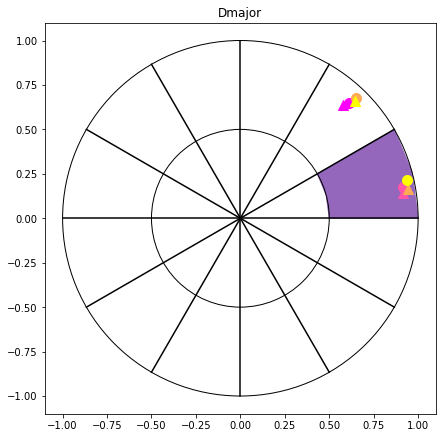

Bminor
Counter({1: 29, 2: 22, 0: 21, 4: 21, 3: 19, 5: 13})
0
[0.40615462 0.19510214 0.43531524 0.19961324]
1
[0.74998024 0.43300128 0.965926   0.258819  ]
2
[ 0.62759855  0.32971545  0.942397   -0.29957245]
3
[0.85694958 0.44757184 0.34042026 0.29821821]
4
[0.73715233 0.30844186 0.68575995 0.71943171]
5
[ 0.965926   -0.258819    0.928775   -0.02986369]


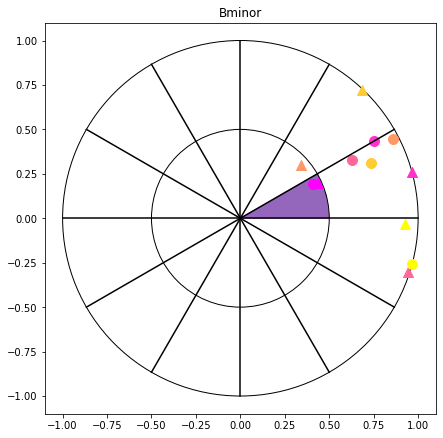

Gmajor
Counter({1: 302, 3: 299, 2: 291, 0: 252})
0
[0.58269049 0.64216644 0.93306996 0.15978152]
1
[0.94833463 0.2215388  0.66233719 0.68309621]
2
[0.93439233 0.17565898 0.92140862 0.13733556]
3
[0.61580336 0.65946921 0.629181   0.65684129]


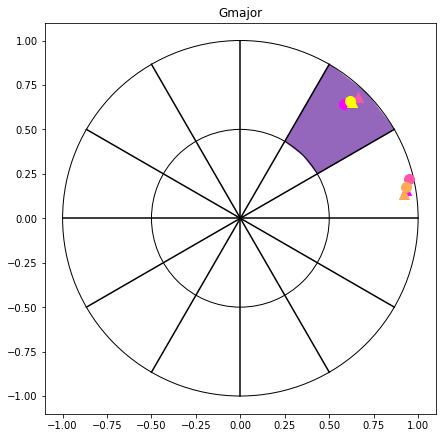

Eminor
Counter({1: 59, 0: 56, 4: 50, 2: 37, 3: 36})
0
[0.965926   0.07394829 0.64459163 0.66353196]
1
[0.50395181 0.5187178  0.96153924 0.18103269]
2
[0.453543   0.46753327 0.364297   0.29484824]
3
[0.95873658 0.08819939 0.89884781 0.21208786]
4
[0.54706046 0.57862642 0.707107   0.707107  ]


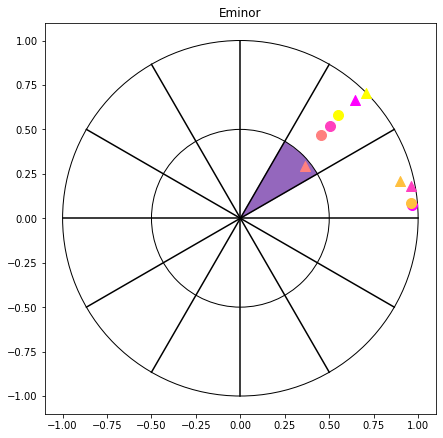

Cmajor
Counter({0: 26, 1: 18, 2: 7, 3: 4})
0
[0.65671515 0.61592046 0.965926   0.13936408]
1
[0.73971744 0.62186628 0.43263717 0.6486975 ]
2
[-0.11092243  0.965926    0.89197771  0.38690129]
3
[ 0.965926   -0.1294095   0.77181175 -0.595035  ]


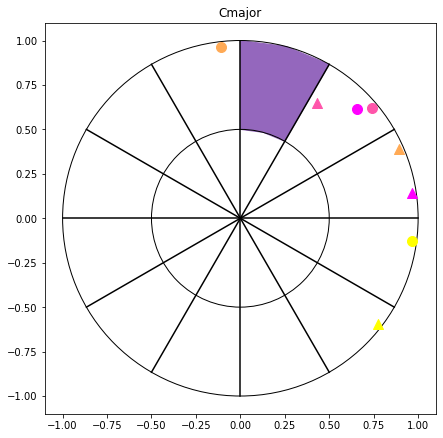

Aminor
Counter({0: 47, 3: 38, 1: 22, 2: 12})
0
[0.87875281 0.28502215 0.64491206 0.68050849]
1
[0.54797695 0.6400945  0.94397314 0.15882077]
2
[0.19334017 0.36222225 0.15309325 0.41036358]
3
[0.94050689 0.11578747 0.92779734 0.04427171]


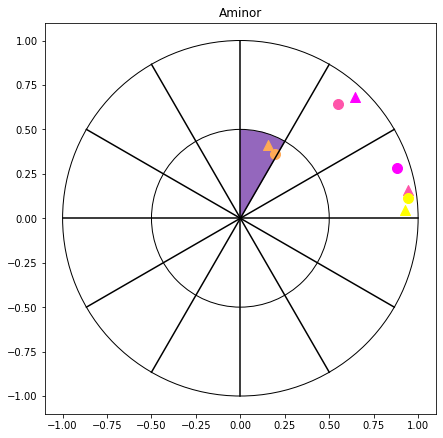

Fmajor
Counter({0: 5, 1: 5})
0
[0.965926  0.0517638 0.8623984 0.0517638]
1
[0.2828428 0.7727408 0.3207366 0.8106346]


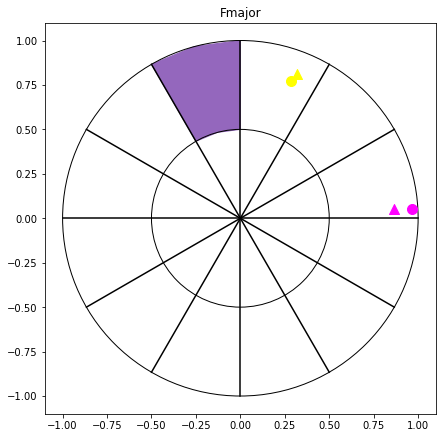

Dminor
Counter({0: 16, 3: 11, 2: 8, 1: 8, 4: 6})
0
[-0.21129631  0.41016987 -0.16710219  0.44252237]
1
[0.68342325 0.5066465  0.65107088 0.5626825 ]
2
[ 0.81283288  0.217798    0.90555562 -0.08088087]
3
[-0.26343427  0.45628145  0.69849473  0.63421227]
4
[ 0.965926   -0.258819    0.595035    0.53610933]


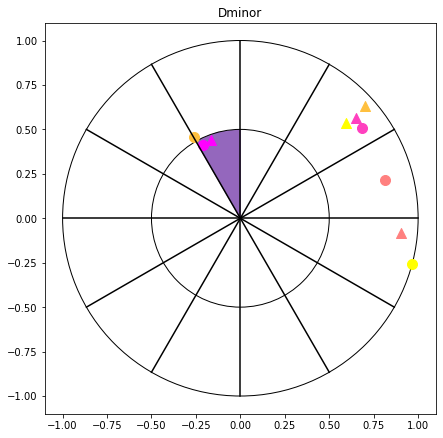

Bflatmajor
Gminor
Counter({1: 6, 0: 3, 2: 3})
0
[-0.321975    0.55767733 -0.16098733  0.600814  ]
1
[0.6381715  0.34354383 0.30040683 0.40246917]
2
[-0.117851    0.43982633  0.600814    0.07471467]


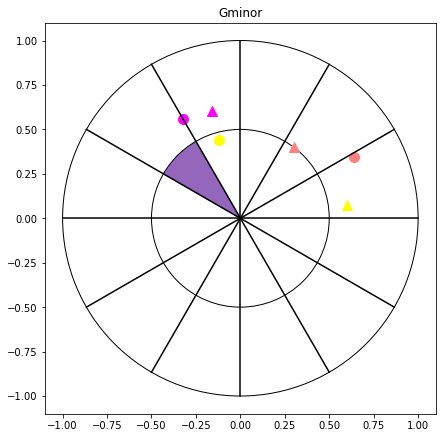

Eflatmajor
Cminor
Amajor
Counter({1: 60, 0: 52, 3: 36, 2: 24})
0
[ 0.94601685 -0.29330269  0.91450996 -0.09074613]
1
[0.83540212 0.22384538 0.78795193 0.36958033]
2
[0.61082408 0.63239229 0.54795125 0.58819808]
3
[ 0.81283289  0.41999567  0.94435775 -0.29617633]


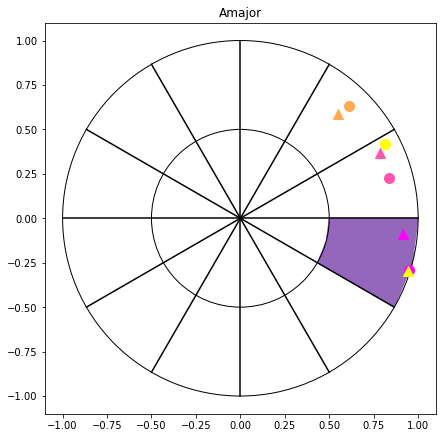

Fsharpminor
Emajor
Counter({1: 5, 0: 4, 2: 4})
0
[0.50664625 0.3298695  0.965926   0.1294095 ]
1
[ 8.623984e-01 -4.381342e-01  7.727408e-01  2.000000e-07]
2
[0.60370375 0.16176225 0.23281225 0.3859055 ]


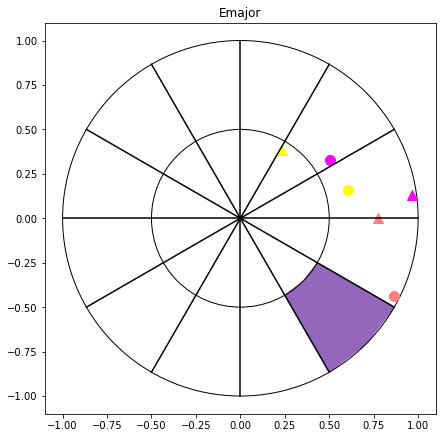

Csharpminor
Bmajor
Gsharpminor
Gflatmajor
Eflatminor
Dflatmajor
Bflatminor
Aflatmajor
Fminor
{'Dmajor': array([[0.61104247, 0.64966167, 0.57583191, 0.63951454],
       [0.91287501, 0.17800638, 0.91624739, 0.14033325],
       [0.64773651, 0.67597125, 0.94446098, 0.16296013],
       [0.93837442, 0.21322172, 0.64228805, 0.66205411]]), 'Bminor': array([[ 0.40615462,  0.19510214,  0.43531524,  0.19961324],
       [ 0.74998024,  0.43300128,  0.965926  ,  0.258819  ],
       [ 0.62759855,  0.32971545,  0.942397  , -0.29957245],
       [ 0.85694958,  0.44757184,  0.34042026,  0.29821821],
       [ 0.73715233,  0.30844186,  0.68575995,  0.71943171],
       [ 0.965926  , -0.258819  ,  0.928775  , -0.02986369]]), 'Gmajor': array([[0.58269049, 0.64216644, 0.93306996, 0.15978152],
       [0.94833463, 0.2215388 , 0.66233719, 0.68309621],
       [0.93439233, 0.17565898, 0.92140862, 0.13733556],
       [0.61580336, 0.65946921, 0.629181  , 0.65684129]]), 'Eminor': array([[0.965926  , 0.07394829, 0.6445

In [ ]:
from collections import Counter
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
centroids_key = {}
for v in keys_to_co_ords.keys():
  k = []
  i = 0
  print(v)
  for key in df_dict_3.keys():
    samp = df_dict_3[key]
    if samp.iloc[0,:]['mode'] in list_of_modes or samp.iloc[1,:]['mode'] in list_of_modes or samp.iloc[2,:]['mode'] in list_of_modes:
      continue
    elif samp.iloc[0,:]['mode'] == v:
      xy = keys_to_co_ords[samp.iloc[1,:]['mode']]
      zw = keys_to_co_ords[samp.iloc[2,:]['mode']]
      xyzw = xy +zw
      k.append(xyzw)
      i+=1
    else:
      continue
  if len(k)>0:
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters= keys_to_no_clusters[v], random_state=44)
    label = kmeans.fit_predict(k)
    centroids = kmeans.cluster_centers_
    centroids_key[v]=centroids
    n_x = []
    n_y = []
    n_z = []
    n_w = []
    num =0
    print(Counter(label))
    for t in range(len(centroids)):
      n_x.append(centroids[t][0])
      n_y.append(centroids[t][1])
      n_z.append(centroids[t][2])
      n_w.append(centroids[t][3])
      print(num)
      print(centroids[t])
      num+=1
    figure, axes = plt.subplots(constrained_layout = True, figsize= (6,6)) 
    outer = plt.Circle(( 0, 0 ), 1, fill = False)
    inner = plt.Circle(( 0 , 0 ), 0.5, fill =False)
    b = [[1,0,-1,0],[0.8660,0.5,-0.8660,-0.5],[0.5,0.8660,-0.5,-0.8660],[0,1,0,-1],[0.8660,-0.5,-0.8660,0.5],[0.5,-0.8660,-0.5,0.8660]]
    for i in b:
      plt.plot((i[0], i[2]), (i[1], i[3]), 'k-')
    axes.set_aspect( 1 ) 
    axes.add_artist(outer) 
    axes.add_artist(inner)
    x = keys_to_fill[v][0]
    y = keys_to_fill[v][1]
    plt.fill(x,y,c='tab:purple', zorder=1)
    colors = cm.spring(np.linspace(0, 1, keys_to_no_clusters[v]))
    for i in range(len(n_x)):
      plt.scatter(n_x[i] , n_y[i] , s = 100, color = colors[i], marker = 'o', zorder=2)
      plt.scatter(n_z[i] , n_w[i] , s = 100, color = colors[i], marker = "^", zorder=2)
    plt.xlim( -1.1 , 1.1 ) 
    plt.ylim( -1.1, 1.1 )  
    
    plt.title(v) 

    plt.show()


- clusters the data for each key using k-means clustering
- the number of clusters were set in the dictionary above
- the keys of the two data points of each set are plotted in 4D
  - x and y are the coords of the key of the 2nd tune
  - z and w are the coords of the key of the 3rd tune
- centroids are plotted on the circle of fifths, with th 4D data split as two points of 2D data
- the number of data points in each cluster is counted to get a ratio of clusters to each other 


Dmajor


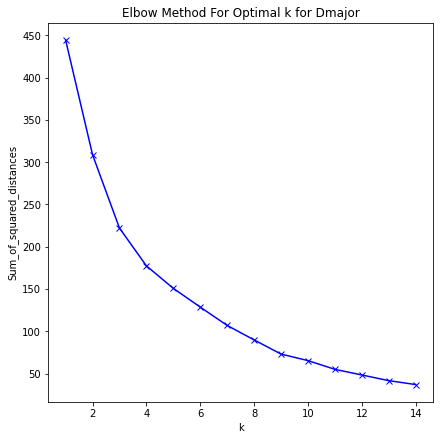

Bminor


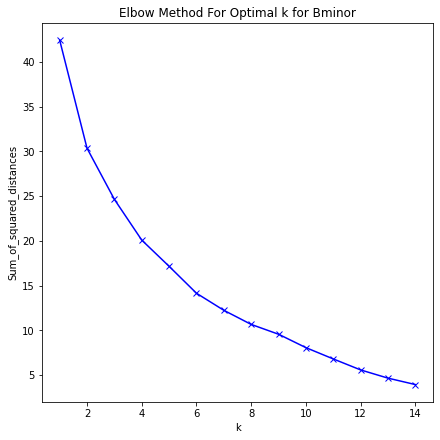

Gmajor


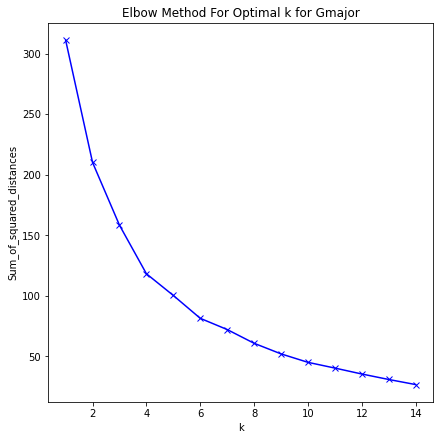

Eminor


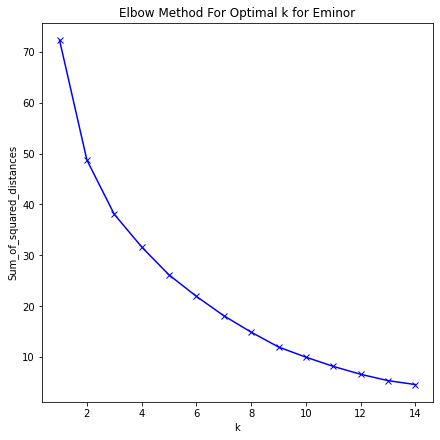

Cmajor


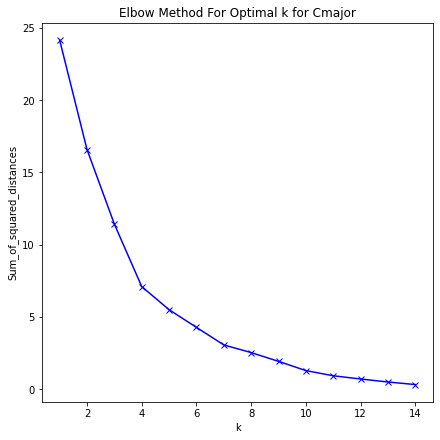

Aminor


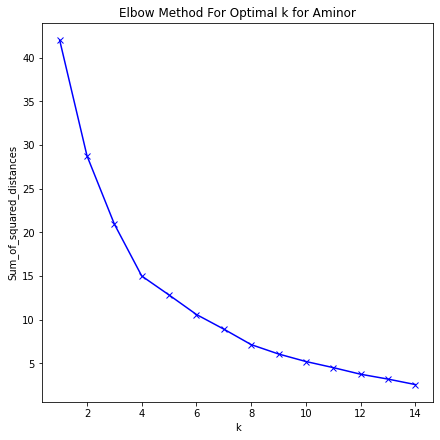

Fmajor


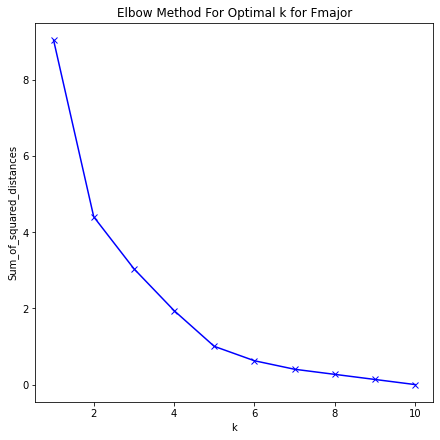

Dminor


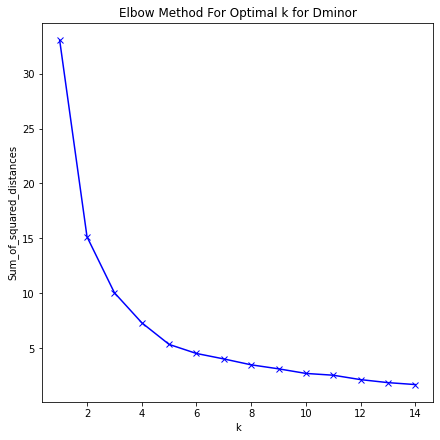

Bflatmajor
Gminor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.


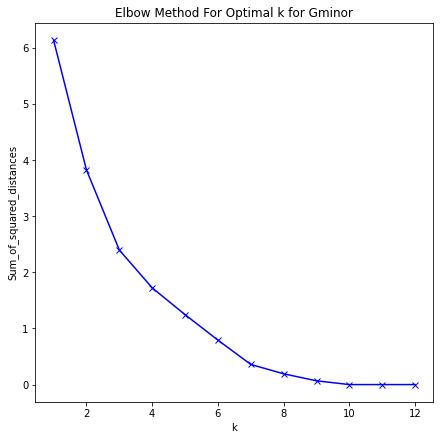

Eflatmajor
Cminor
Amajor


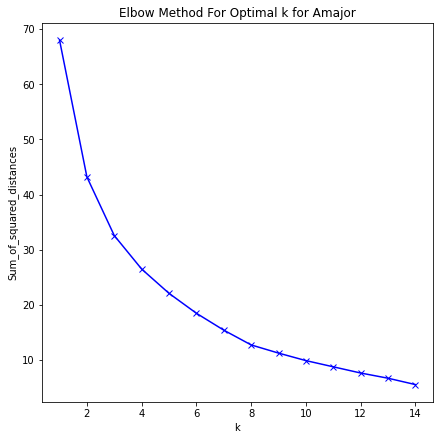

Fsharpminor
Emajor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (13). Possibly due to duplicate points in X.


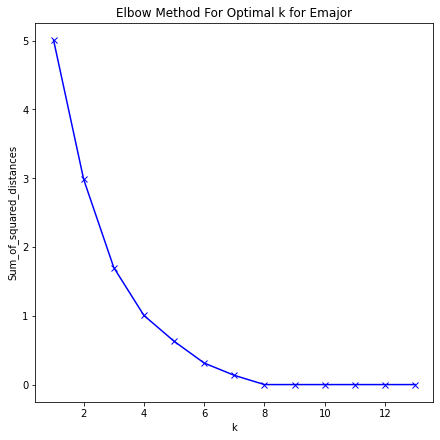

Csharpminor
Bmajor
Gsharpminor
Gflatmajor
Eflatminor
Dflatmajor
Bflatminor
Aflatmajor
Fminor


In [ ]:
for v in keys_to_co_ords.keys():
  k = []
  i = 0
  print(v)
  for key in df_dict_3.keys():
    samp = df_dict_3[key]
    if samp.iloc[0,:]['mode'] in list_of_modes or samp.iloc[1,:]['mode'] in list_of_modes or samp.iloc[2,:]['mode'] in list_of_modes:
      continue
    elif samp.iloc[0,:]['mode'] == v:
      xy = keys_to_co_ords[samp.iloc[1,:]['mode']]
      zw = keys_to_co_ords[samp.iloc[2,:]['mode']]
      xyzw = xy +zw
      k.append(xyzw)
      i+=1
    else:
      continue
  if len(k)>0:
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    no_clusters = range(1,15)
    i = 15
    for n in no_clusters:
      if(len(k) < n):
        i = n
        break
      km = KMeans(n_clusters=n)
      km = km.fit(k)
      Sum_of_squared_distances.append(km.inertia_)
    figure, axes = plt.subplots(constrained_layout = True, figsize= (6,6))
    x_range = range(1,i) 
    plt.plot(x_range, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k for ' + v)
    plt.show()



- plots the sum of squared distances against number of clusters for each key
- this is paritally how we determine the number of clusters
  - through the elbow method

For n_clusters = 4 The average silhouette_score is : 0.3124621270939863


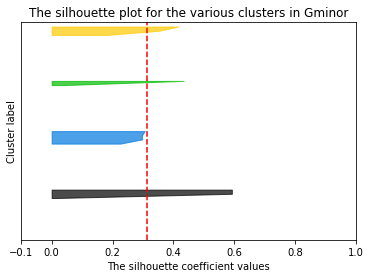

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
v = 'Gminor'
k=[]
for key in df_dict_3.keys():
  samp = df_dict_3[key]
  if samp.iloc[0,:]['mode'] in list_of_modes or samp.iloc[1,:]['mode'] in list_of_modes or samp.iloc[2,:]['mode'] in list_of_modes:
    continue
  elif samp.iloc[0,:]['mode'] == v:
    xy = keys_to_co_ords[samp.iloc[1,:]['mode']]
    zw = keys_to_co_ords[samp.iloc[2,:]['mode']]
    xyzw = xy +zw
    k.append(xyzw)

from sklearn.cluster import KMeans
n = 4
figure, axes = plt.subplots()
axes.set_xlim([-0.1, 1])

axes.set_ylim([0, len(k) + (n + 1) * n*2])
km = KMeans(n_clusters=n, random_state=44)
cluster_labels = km.fit_predict(k)
silhouette_avg = silhouette_score(k, cluster_labels)
sample_silhouette_values = silhouette_samples(k, cluster_labels)
print("For n_clusters =", n,
    "The average silhouette_score is :", silhouette_avg)
y_lower = 10
for d in range(0,n):
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == d]
  ith_cluster_silhouette_values.sort()
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(d) / n)
  axes.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples
axes.set_title("The silhouette plot for the various clusters in Gminor")
axes.set_xlabel("The silhouette coefficient values")
axes.set_ylabel("Cluster label")
axes.axvline(x=silhouette_avg, color="red", linestyle="--")
axes.set_yticks([])  # Clear the yaxis labels / ticks
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    


- this plots the silhouette score of a given key for a given number of clusters - this example is for k = 4 clusters in G minor
